<a href="https://colab.research.google.com/github/mateusmarinho/bootcamp_machine_learning/blob/main/Desafio_M%C3%B3dulo_1_Mateus_Marinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (1).csv


In [ ]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
dataframe = pd.read_csv(nome_do_arquivo)

In [ ]:
#apresentando as 5 primeiras linhas do dataset
dataframe.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


**1.No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**

In [ ]:
dataframe.shape

(17379, 17)

In [ ]:
print(f'Instâncias: {dataframe.shape[0]}\nAtributos: {dataframe.shape[1]}')

Instâncias: 17379
Atributos: 17


**2. Quantos tipos diferentes de dados existem no dataset do desafio?**

In [ ]:
dataframe.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
dataframe.dtypes.value_counts()

float64    16
object      1
dtype: int64

**3. Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?**

In [ ]:
print(f'Valores nulos na coluna <<temp>>: {dataframe.temp.isna().sum()}')
print(f'Total de linhas no dataframe: {len(dataframe)}')
nulos_temp = (dataframe.temp.isna().sum() / len(dataframe)) * 100
print(f'Porcentagem de valores nulos em temp: {nulos_temp:.2f} %')

Valores nulos na coluna <<temp>>: 1738
Total de linhas no dataframe: 17379
Porcentagem de valores nulos em temp: 10.00 %


**4. Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?**

In [ ]:
print(f'Valores nulos na coluna <<dteday>>: {dataframe.dteday.isna().sum()}')
print(f'Valores não nulos na coluna <<dteday>>: {len(dataframe) - dataframe.dteday.isna().sum()}')
# Esse valor pode ser acessado com a função info()

Valores nulos na coluna <<dteday>>: 1738
Valores não nulos na coluna <<dteday>>: 15641


**5. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?**

In [ ]:
media_temp = dataframe.temp[dataframe.dteday.isna()==False].mean()
print(f'Média <<temp>> normalizada: {media_temp:.4f}')

Média <<temp>> normalizada: 0.4969


**6. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?**

In [ ]:
desvio_wind = dataframe.windspeed[dataframe.dteday.isna()==False].std()
print(f'Desvio padrão <<windspeed>>: {desvio_wind:.4f}')

Desvio padrão <<windspeed>>: 0.1223


**7. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?**

In [ ]:
dataframe.season = pd.Categorical(dataframe.season)
dataframe.season.value_counts()

3.0    4032
2.0    3970
4.0    3827
1.0    3812
Name: season, dtype: int64

In [ ]:
print('Quantidade de categorias: {}'.format(len(dataframe.season.value_counts())))

Quantidade de categorias: 4


> **8. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?**



In [ ]:
dataframe.dteday = pd.to_datetime(dataframe.dteday, format="%Y-%m-%d")
dataframe[dataframe.dteday.isna()==False].tail(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


**9. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerando o boxplot da variável "windspeed" (velocidade do vento), é CORRETO afirmar:**

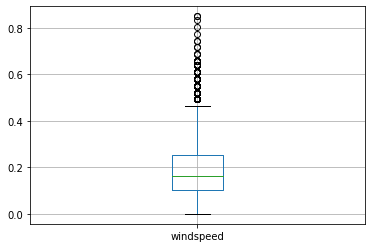

In [ ]:
dataframe[dataframe.dteday.isna()==False].boxplot(['windspeed'])

**10. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt", é CORRETO afirmar:**

In [ ]:
corr_mat = dataframe[dataframe.dteday.isna()==False][['cnt', 'hum', 'season', 'temp', 'atemp', 'windspeed']].corr()
corr_mat.style.format("{:.3}").background_gradient(cmap=plt.get_cmap('PuRd'))

,cnt,hum,temp,atemp,windspeed
cnt,1.0,-0.323,0.406,0.404,0.0917
hum,-0.323,1.0,-0.0699,-0.0542,-0.29
temp,0.406,-0.0699,1.0,0.988,-0.016
atemp,0.404,-0.0542,0.988,1.0,-0.0588
windspeed,0.0917,-0.29,-0.016,-0.0588,1.0


**11. Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.**

In [ ]:
# preencha os valores nulos das colunas "hum", "cnt" e "casual" com os valores médios
dataframe.hum.fillna(dataframe.hum.mean(), inplace=True)
dataframe.cnt.fillna(dataframe.cnt.mean(), inplace=True)
dataframe.casual.fillna(dataframe.casual.mean(), inplace=True)

In [ ]:
data = dataframe[["hum", "cnt", "casual"]]
data.head()

,hum,cnt,casual
0,0.81,16.0,3.0
1,0.80,40.0,8.0
2,0.80,32.0,5.0
3,0.75,13.0,3.0
4,0.75,1.0,0.0


In [ ]:
# utilize as variáveis "hum" e "casual" como independentes e "cnt" como dependente
x = data[["hum", "casual"]].values
y = data.cnt.values

In [ ]:
# aplique uma regressão linear
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
regressao = linreg.fit(x, y)
previsao = linreg.predict(x)

In [ ]:
# parâmetros de regressão
print(f'Y = {linreg.coef_}X {linreg.intercept_}')

Y = [-100.98900093    2.20087962]X 174.98415936102225


In [ ]:
# cálculo do R2
from sklearn.metrics import r2_score
r_2 = r2_score(y, previsao)
print(f'Coeficiente de determinação (R2): {r_2}')

Coeficiente de determinação (R2): 0.40561165206692495


**12. Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique Árvore de Decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".**

In [ ]:
# aplicar árvore de decisão como regressão
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
tree = DecisionTreeRegressor()


In [ ]:
# utilize as entradas como teste e valores "default"
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [ ]:
# aplicando a regressão
tree.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# coeficiente R2
r2 = tree.score(xtest, ytest)
print(f'Coeficiente de determinação R2: {r2}')

Coeficiente de determinação R2: 0.6906099624279474


**13. Comparando os valores de R2 encontrado com a regressão linear e com a Árvore de Decisão, é CORRETO afirmar:**

In [ ]:
print(f'Coeficiente R2 com a regressão linear: {r_2}')
print(f'Coeficiente R2 com a Árvore de Decisão: {tree.score(xtest, ytest)}')
print('A Árvore de Decisão como regressor apresentou maior R2.')

Coeficiente R2 com a regressão linear: 0.40561165206692495
Coeficiente R2 com a Árvore de Decisão: 0.6906099624279474
A Árvore de Decisão como regressor apresentou maior R2.


**14. Comparando o SVM com a Árvore de Decisão é CORRETO afirmar:**

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svm_previsao = svm.predict(xtest)

In [ ]:
print(f'Coeficiente R2 com o SVM: {svm.score(xtest, ytest)}')
print(f'Coeficiente R2 com a Árvore de Decisão: {tree.score(xtest, ytest)}')

Coeficiente R2 com o SVM: 0.4197706023492682
Coeficiente R2 com a Árvore de Decisão: 0.6906099624279474
